# Projeto de dados do mercado financeiro
#### Jonas dos Santos Silva 
##### linkedin https://www.linkedin.com/in/jonas-dos-santos-silva-9682501ab/

#### Neste projeto de dados, nos concentraremos na análise de dados exploratórios dos preços das ações. Tenha em mente que este projeto não é para ser tomado como um conselho financeiro. Este projeto foi inspirado no curso que estou fazendo.
https://www.udemy.com/course/python-para-data-science-e-machine-learning/



## Geopolítica e economia global

### Tenham em ment que no ano de 2008 ocorreram grandes acontecimentos na geopolítica e economia mundial que 'balançaram' o mercado financeiro.

#### 4 de novembro: EUA/ELEIÇÃO PRESIDENCIAL/OBAMA - O democrata Barack Obama obtém uma vitória histórica e esmagadora, tornando-se o primeiro negro a ser eleito para a presidência dos EUA. Obama escolhe sua ex-adversária nas primárias, a senadora Hillary Clinton, para dirigir a diplomacia de seu governo (secretária de Estado) e mantém no Pentágono o atual responsável pela pasta, Robert Gates. É a primeira vez que um secretário da Defesa é mantido no posto em um governo do partido rival.

#### 15 de setembro: CRISE FINANCEIRA E ECONÔMICA - A falência do banco americano "LEHMAN BROTHERS" marca a aceleração de uma crise financeira mundial, nascida em 2007 nos Estados Unidos, com a derrocada do mercado de empréstimos imobiliários de risco ("créditos subprime").

#### Os mais afetados são os estabelecimentos financeiros e o setor automobilístico, que reivindicam ajuda do governo para sobreviver. Vários países entram em recessão, entre eles EUA, Japão, Grã-Bretanha, Alemanha e Itália. Asfixiada, a Islândia consegue ajuda financeira da comunidade internacional e de seus vizinhos nórdicos.


#### Um relatório da ONU, divulgado em dezembro, prevê crescimento mundial de 1% em 2009, com os países desenvolvidos sendo os mais atingidos, com -0,5%.

Link com relatório da crise financeira : https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%932008

### Os Imports

Aqui estão as bibliotecas e os métodos utilizados na análise

In [2]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
#AQUI ESCOLHI O ESTILO PARA OS PLOTS
sns.set_style('whitegrid')
plt.style='whitegrid'

## INFORMAÇÕES

Utilizando dados públicos analizaremos as variações no mercado financeiro dos seguintes bancos.
* Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

### AQUI FIZ AS LEITURAS DOS BANCOS UTILIZANDO O YAHOO COMO FONTE CONFIÁVEL E TAMBÉM ESPECIFIQUEI ALGUNS PARÂMETROS PARA MONTAR O DATASET.

ESSA É UMA ETAPA MAIS TÉCNICA E SE QUISER VC PODE IR DIRETO PARA OS DIAGRAMAS COMENTADOS

In [9]:
start = pd.datetime(2006, 1, 1)
end =  pd.datetime(2016, 1, 1)
BAC = data.DataReader("BAC", "yahoo", start , end)
CG = data.DataReader("C", "yahoo", start , end)
GS = data.DataReader("GS", "yahoo", start , end)
JPM = data.DataReader("JPM", "yahoo", start , end)
MS = data.DataReader("MS", "yahoo", start , end)
WF = data.DataReader("WF", "yahoo", start , end)

tickers = ["BAC", "C", "GS", "JPM", "MS", "WF"]

bank_stocks = pd.concat([BAC, CG, GS, JPM, MS, WF],axis=1, keys=tickers)

bank_stocks.columns.names = ['Bank Ticker','Stock Info']

##### AQUI VERIFICAMOS A NOSSA TABELA

In [11]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      \
Stock Info   Adj Close        High         Low        Open       Close   
Date                                                                     
2006-01-03   35.054218  493.799988  481.100006  490.000000  492.899994   
2006-01-04   34.681938  491.000000  483.500000  488.600006  483.799988   
2006-01-05   34.726604  487.799988  484.000000  484.399994  486.200012   
2006-01-06   34.674480  489.000000  482.000000  488.799988  486.200012   
2006-01-09   34.696808  487.399994  483.000000  486.000000  483.899994   

Bank Ticker    ...             MS                                          WF  \
Stock Info     ...           Open      Close     Volume  Adj Close       High   
Date           ...                                                              
2006-01-03     ...      57.169998  58.310001  5377000.0  37.170383  73.766388   
2006-01-04     ...      58.700001  58.349998  7977800.0  37.195881  74.719902   
2006-01-05     ...      58.549999  58.509998  5778000.0  37.297882  73.420738   
2006-01-06     ...      58.770000  58.570000  6889800.0  37.336124  76.769966   
2006-01-09     ...      58.630001  59.189999  4144500.0  37.731342  75.268173   

Bank Ticker                                                       
Stock Info         Low       Open      Close   Volume  Adj Close  
Date                                                              
2006-01-03   72.228844  72.705605  72.884384  23400.0  55.094921  
2006-01-04   72.884384  73.122765  74.016685  27200.0  55.950855  
2006-01-05   72.526817  73.003578  72.669846  11000.0  54.932743  
2006-01-06   73.897499  73.897499  75.744934  34800.0  57.257271  
2006-01-09   74.195473  74.493446  74.195473  30900.0  56.086002  

[5 rows x 36 columns]

# Análise de dados exploratória

#### AQUI VERIFICAMOS O PREÇO MÁXIMO DE FECHAMENTO PARA CADA BANCO DURANTE TODO O PERÍODO

In [13]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WF      99.868889
dtype: float64

#### AQUI EU CRIEI  UMA OUTRA TABELA COM OS RETORNOS PARA AS AÇÕES DE CADA BANCO

In [17]:
returns = pd.DataFrame()
for item in tickers:
    returns[item+' Return'] = bank_stocks[item]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WF Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,0.015536
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.018196
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.042316
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.020456


##### UTILIZANDO A BIBLIOTECA "SEABORN" USEI O PAIRPLOT PARA PRIMEIRA VISUALIZAÇÃO.

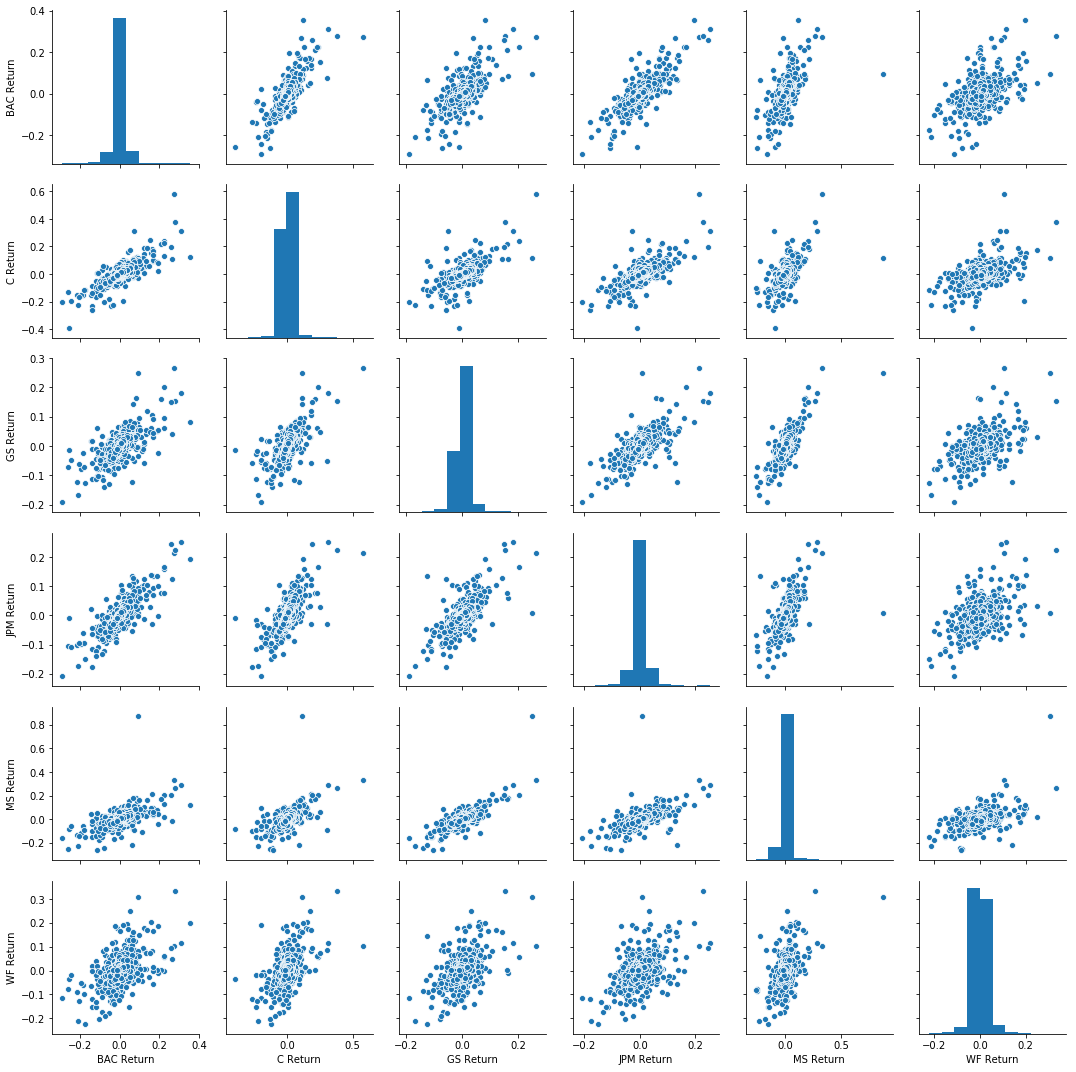

In [19]:
sns.pairplot(returns[1:])

** Usando o seu DataFrame returns, descubra quais datas cada ação dos bancos teve o melhor e o pior dia de retorno.
#### Quais ações tiveram o melhor e o pior retorno ?

In [22]:
returns.idxmin() 

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WF Return    2008-09-29
dtype: datetime64[ns]

In [23]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WF Return    2009-03-10
dtype: datetime64[ns]

#### Utilizando o desvio padrão aqui podemos analizar as ações durante todo o período de tempo ?

In [24]:
returns.std()

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WF Return     0.035348
dtype: float64

#### E quanto ao risco no ano 2015?

In [26]:
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WF Return     0.022002
dtype: float64

** Crie um distplot usando seaborn dos retornos de 2015 para Morgan Stanley **

# Agora chegou a hora de visulaizar as informações em gráficos.

#### Aqui estão retornos de 2015 para Morgan Stanley

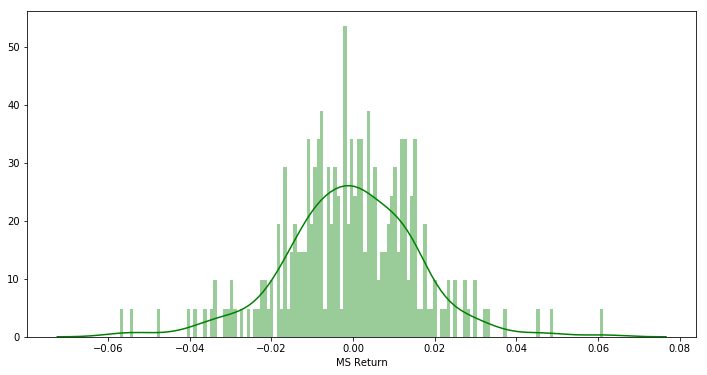

In [29]:
plt.figure(figsize=(12,6))
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'],color='green', bins=145)

#### Aqui estão os retornos de 2008 para CitiGroup

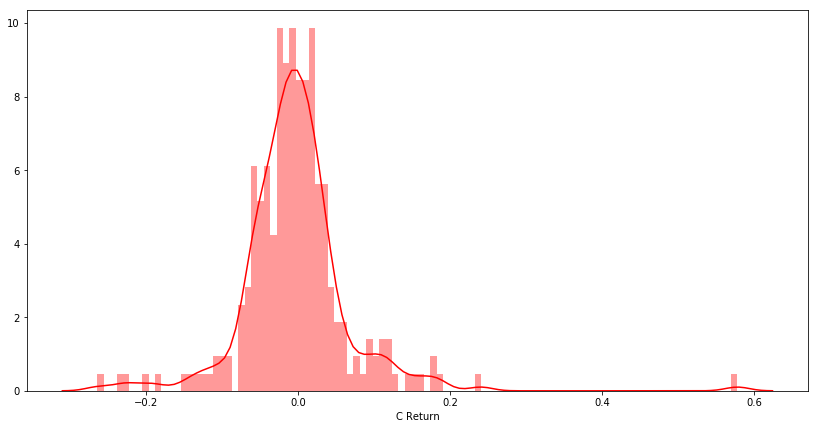

In [35]:
plt.figure(figsize=(14,7))
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Return'],color='red',bins=100)

### Aqui criei o famoso e amigável gráfico de linha mostrando o preço de fechamento para cada banco para todo o índice de tempo.

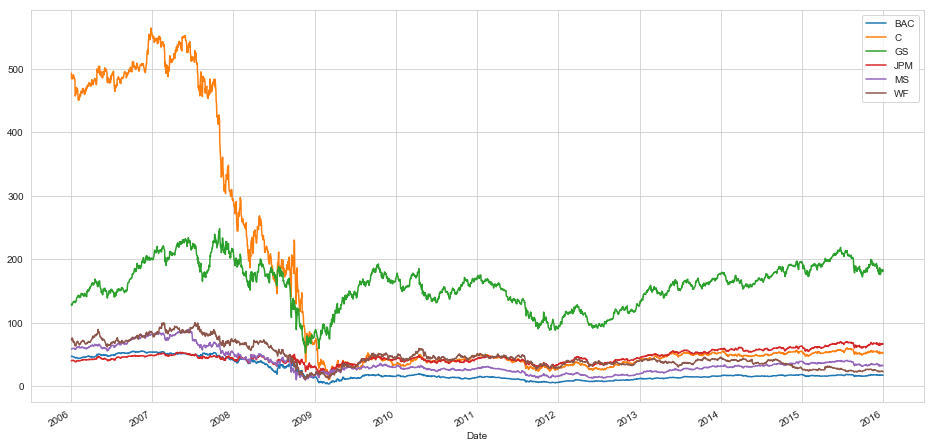

In [52]:

for item in tickers:
    bank_stocks[item]['Close'].plot(figsize=(16,8), label=item)
plt.legend()

### Nesse gráfico é exibido o volume para cada banco para todo o índice de tempo.

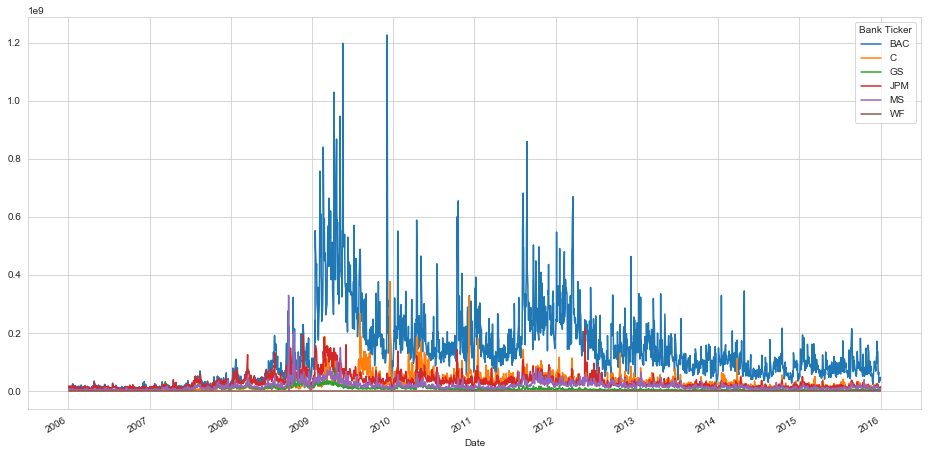

In [59]:
bank_stocks.xs(key='Volume',axis=1,level='Stock Info').plot(figsize=(16,8))

### E as médias móveis de 30 dias para o preço do Bank Of America para o ano de 2008 por exemplo ?

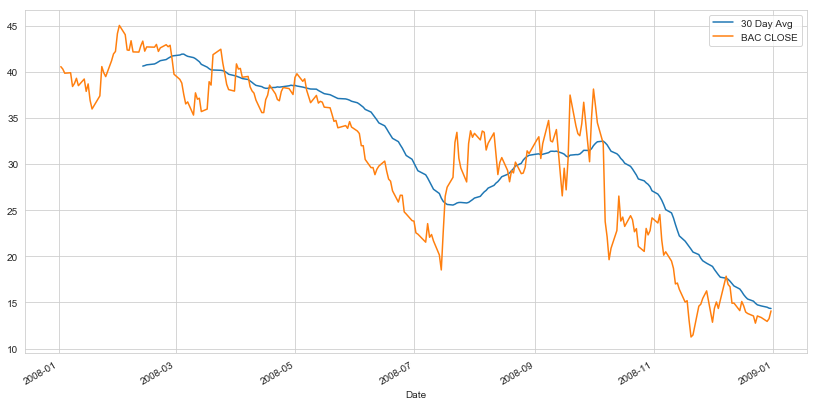

In [61]:
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(figsize=(14,7),label='30 Day Avg')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()

### Aqui um mapa de calor da correlação entre os preços de fechamento das ações.

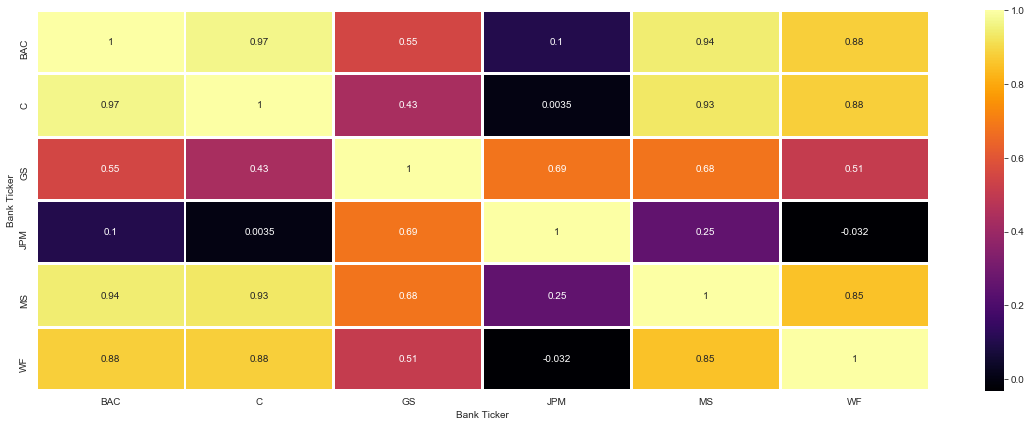

In [62]:
plt.figure(figsize=(20,7))
sns.heatmap(data=bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True,cmap='inferno',linewidths=2)

### Aqui usei um clustermap para agrupar as correlações

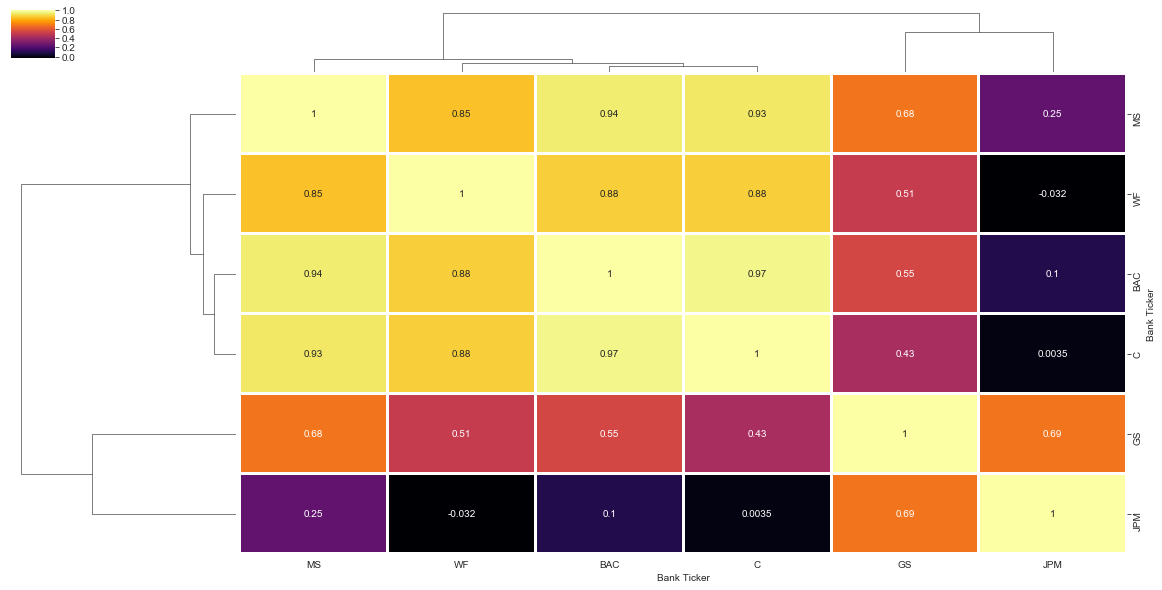

In [66]:
sns.clustermap(data=bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True,cmap='inferno',linewidths=2, figsize=(20,10))